In [1]:

import csv as csv
import random
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# model = Perceptron()
model = svm.SVC()
# model = KNeighborsClassifier(n_neighbors=3)
# model = GaussianNB()

In [3]:
#read csv data from the file 
with open('banknotes.csv') as f:
    reader = csv.reader(f)
    next(reader)

    data = []
    for row in reader:
        data.append({
            "evidence": [float(cell) for cell in row[:4]],
            "label": "Authentic" if row[4]=="0" else "Counterfeit" 
        })

In [4]:
#split up the datasets into training and testing
holdout =  int(0.5* len(data))
random.shuffle(data)
training = data[:holdout]
testing = data[holdout:]


In [5]:
#train the model on training set
X_training = [row["evidence"] for row in training]
y_training = [row["label"] for row in training]
model.fit(X_training, y_training)

SVC()

In [6]:
#make predictions on the training set
X_testing = [row["evidence"] for row in testing]
y_testing = [row["label"] for row in testing]
predictions = model.predict(X_testing)

In [7]:
# Compute how well we performed
correct = 0
incorrect = 0
total = 0
for actual, predicted in zip(y_testing, predictions):
    total += 1
    if actual == predicted:
        correct += 1
    else:
        incorrect += 1

# Print results
print(f"Results for model {type(model).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

Results for model SVC
Correct: 684
Incorrect: 2
Accuracy: 99.71%


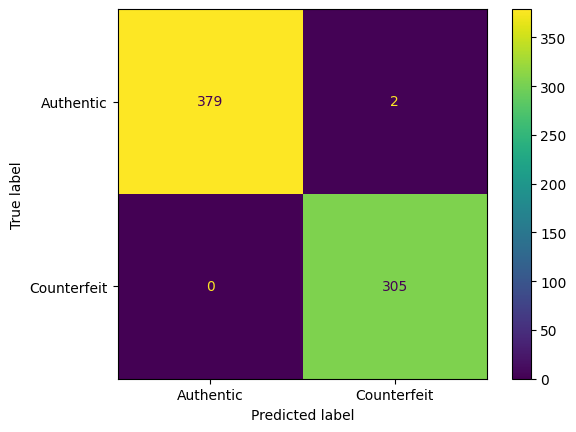

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_testing, predictions, labels=["Authentic", "Counterfeit"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Authentic", "Counterfeit"])

disp.plot()